In [2]:
# TP 1 : Using K-nn neigbhors to predict written numbers (0-9) on gray images (28x28 pixels)

# import data from MNIST Database
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')


In [22]:
# print different parameters of the MNIST database
print ("mnist :  {}".format(mnist))
print ("mnist.data : {}".format(mnist.data))
print ("mnist.target : {}".format(mnist.target))
print ("size of mnist.data : {}".format(len(mnist.data)))
print ("shape of mnist.data : {}".format(mnist.data.shape))
print ("shape of mnist.target : {}".format(mnist.target.shape))



mnist :  {'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pi

In [23]:
# print specific elements of mnist.data
print ("mnist.data[0] : {}".format(mnist.data[0]))
print ("mnist.data[0][1] : {}".format(mnist.data[0][1]))
print ("mnist.data[:,1] : {}".format(mnist.data[:,1]))
print ("mnist.data[:100] : {}".format(mnist.data[:100]))

mnist.data[0] : [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0. 

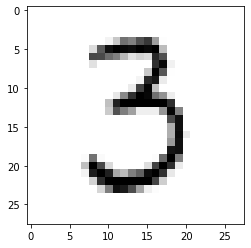

class : 3


In [3]:
# print chosen image from MNIST dataset and show its class
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
images = mnist.data.reshape((-1, 28, 28))
plt.imshow(images[50],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print("class : {}".format(mnist.target[50]))

In [4]:
# create sub dataset based on MNIST to reduce computation time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

random = np.random.randint(70000, size=5000)
new_data = mnist.data[random]
new_target = mnist.target[random]

# divide dataset into training and test parts
xtrain, xtest, ytrain, ytest = train_test_split(new_data, new_target, train_size=0.8)

model has been trained with 10 neighbors in 0.11590242385864258 seconds
model has been tested : precision = 0.908
predictions probabilities for image 4 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
classification for image 4 : 
	Target : 1
	Prediction : 1
representation of the tested image : 


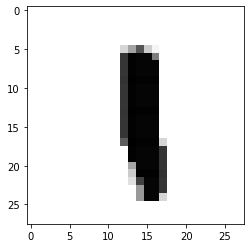

In [5]:
# fit model with K neighbors, then show different results
from sklearn.neighbors import KNeighborsClassifier
import time

K = 10# number of neighbor
image_ID = 4 # image from test dataset that we want to test with the trained model
DRAW = True
if (DRAW):
    import matplotlib.pyplot as plt
    %matplotlib inline
    
# define classifier
classifier = KNeighborsClassifier(K)

# train classifier with xtrain and ytrain
debut = time.time()
classifier.fit(xtrain, ytrain)
print("model has been trained with {} neighbors in {} seconds".format(K, time.time()-debut))

# show validation score (precision score on test part of the dataset)
test_score = classifier.score(xtest, ytest)
print ("model has been tested : precision = {}".format(test_score))

# find prediction probabilities for one (chosen) image. 
probabilities = classifier.predict_proba(xtest)
print ("predictions probabilities for image {} : {}".format(image_ID, probabilities[image_ID]))

# show classification for a given image, compared to the target classification
classification = classifier.predict(xtest)
print("classification for image {} : \n\tTarget : {}\n\tPrediction : {}".format(image_ID, ytest[image_ID], classification[image_ID]))

if (DRAW):
    print("representation of the tested image : ")
    images = xtest.reshape((-1, 28, 28))
    plt.imshow(images[image_ID],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.show()

In [34]:
# test influence of number of neighbors on the dataset

precision_list = []

for K in range(2,16):
    # define classifier
    classifier = KNeighborsClassifier(K)

    # train classifier with xtrain and ytrain
    classifier.fit(xtrain, ytrain)
    print("model has been trained with {} neighbors".format(K))

    # show validation score (precision score on test part of the dataset)
    test_score = classifier.score(xtest, ytest)

    #  add current precision to result list
    precision_list.append([K, test_score])
    
print("list of precision score depending on number of neighbors : \n{}".format(precision_list))

model has been trained with 2 neighbors
model has been trained with 3 neighbors
model has been trained with 4 neighbors
model has been trained with 5 neighbors
model has been trained with 6 neighbors
model has been trained with 7 neighbors
model has been trained with 8 neighbors
model has been trained with 9 neighbors
model has been trained with 10 neighbors
model has been trained with 11 neighbors
model has been trained with 12 neighbors
model has been trained with 13 neighbors
model has been trained with 14 neighbors
model has been trained with 15 neighbors
list of precision score depending on number of neighbors : 
[[2, 0.923], [3, 0.935], [4, 0.925], [5, 0.925], [6, 0.918], [7, 0.921], [8, 0.92], [9, 0.917], [10, 0.919], [11, 0.915], [12, 0.919], [13, 0.914], [14, 0.914], [15, 0.912]]


In [41]:
# test influence of percentage of training and test parts on the model (without changing the model itself)

precision_list = []

for percentage in range(10, 100, 10):

    # divide dataset into training and test parts
    xtrain, xtest, ytrain, ytest = train_test_split(new_data, new_target, train_size=float(percentage/100))
    
    # define classifier
    classifier = KNeighborsClassifier(3)

    # train classifier with xtrain and ytrain
    classifier.fit(xtrain, ytrain)
    print("model has been trained with {} % of training percentage".format(percentage))

    # show validation score (precision score on test part of the dataset)
    test_score = classifier.score(xtest, ytest)
    
    # add current precision to result list
    precision_list.append([percentage, test_score])

print("list of precision score depending on training percentage : \n{}".format(precision_list))

model has been trained with 10 % of training percentage
model has been trained with 20 % of training percentage
model has been trained with 30 % of training percentage
model has been trained with 40 % of training percentage
model has been trained with 50 % of training percentage
model has been trained with 60 % of training percentage
model has been trained with 70 % of training percentage
model has been trained with 80 % of training percentage
model has been trained with 90 % of training percentage
list of precision score depending on training percentage : 
[[10, 0.8417777777777777], [20, 0.88725], [30, 0.9091428571428571], [40, 0.9056666666666666], [50, 0.9192], [60, 0.9265], [70, 0.9306666666666666], [80, 0.935], [90, 0.932]]


In [42]:
# measure influence of the size of the dataset on test precision
# WARNING : COMPUTATION TIME MIGHT BE VERY LONG. ENSURE THAT YOU HAVE A CORRECT COMPUTER IN ORDER TO RUN THIS CODE 
#(NOT ADVISED ON LAPTOPS)

precision_list = []

for size in range(1000, 70000, 5000):

    random = np.random.randint(70000, size=size)
    new_data = mnist.data[random]
    new_target = mnist.target[random]

    # divide dataset into training and test parts
    xtrain, xtest, ytrain, ytest = train_test_split(new_data, new_target, train_size=0.8)
    
     # define classifier
    classifier = KNeighborsClassifier(3)

    # train classifier with xtrain and ytrain
    classifier.fit(xtrain, ytrain)
    print("model has been trained with a dataset of size {}".format(size))

    # show validation score (precision score on test part of the dataset)
    test_score = classifier.score(xtest, ytest)
    
    # add current precision to result list
    precision_list.append([size, test_score])
    
print("list of precision score depending on dataset size : \n{}".format(precision_list)) 

model has been trained with a dataset of size 1000
model has been trained with a dataset of size 6000
model has been trained with a dataset of size 11000
model has been trained with a dataset of size 16000
model has been trained with a dataset of size 21000
model has been trained with a dataset of size 26000
model has been trained with a dataset of size 31000
model has been trained with a dataset of size 36000
model has been trained with a dataset of size 41000
model has been trained with a dataset of size 46000
model has been trained with a dataset of size 51000
model has been trained with a dataset of size 56000
model has been trained with a dataset of size 61000
model has been trained with a dataset of size 66000
list of precision score depending on training percentage : 
[[1000, 0.855], [6000, 0.94], [11000, 0.9459090909090909], [16000, 0.9575], [21000, 0.9607142857142857], [26000, 0.963076923076923], [31000, 0.9643548387096774], [36000, 0.9641666666666666], [41000, 0.9691463414634